In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [45]:
resultados_exames = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv")

In [46]:
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [47]:
valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

In [48]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [49]:
419/569

0.7363796133567663

Como temos 73,6 % de dados nulos no exame_33, vamos remover essa coluna para o modelo

In [50]:
SEED=123143
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [51]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,0.1665,0.5864,1.354,8.966,0.008261,0.022130,0.03259,0.010400,0.017080,0.003806,9.628,19.62,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,0.2084,1.3500,1.314,17.580,0.005768,0.008082,0.01510,0.006451,0.013470,0.001828,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,0.3198,1.4890,2.230,20.740,0.008902,0.047850,0.07339,0.017450,0.027280,0.007610,11.690,25.21,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,0.07696,0.3538,1.1300,2.388,19.630,0.015460,0.025400,0.02197,0.015800,0.039970,0.003901,10.570,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.1880,8.077,106.000,0.006883,0.010940,0.01818,0.019170,0.007882,0.001754,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


In [52]:
treino_y.head()

114    B
457    B
269    B
520    B
38     M
Name: diagnostico, dtype: object

In [53]:
SEED=123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns=['exame_33'])

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

resultado = classificador.score(teste_x, teste_y)
print(f"Resultado da classificação {round(resultado*100,2)}%")

Resultado da classificação 92.4%


In [54]:
SEED=123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy="most_frequent")
classificador_bobo.fit(treino_x, treino_y)

resultado_bobo = classificador_bobo.score(teste_x, teste_y)
print(f"Resultado da classificação {round(resultado_bobo*100,2)}%")

Resultado da classificação 66.67%


In [55]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:, 0:10]], axis=1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [56]:
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

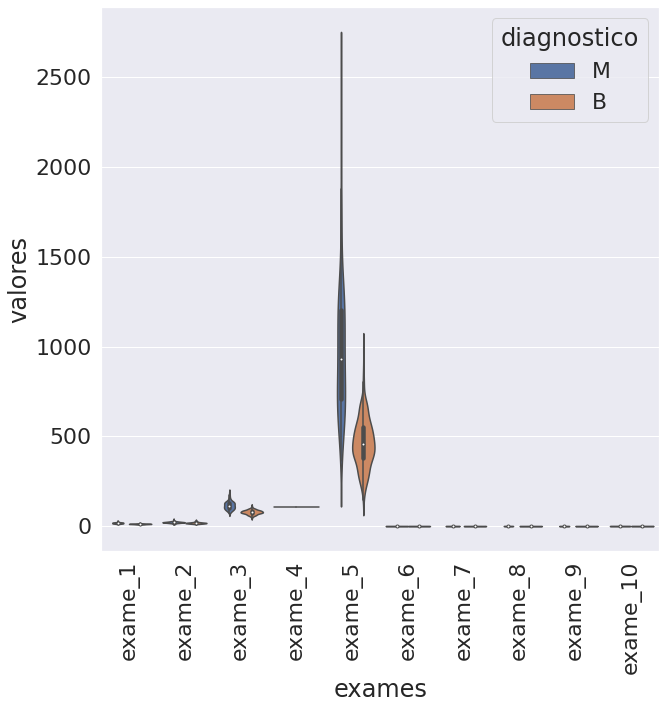

In [57]:
plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y="valores", hue="diagnostico", data=dados_plot)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

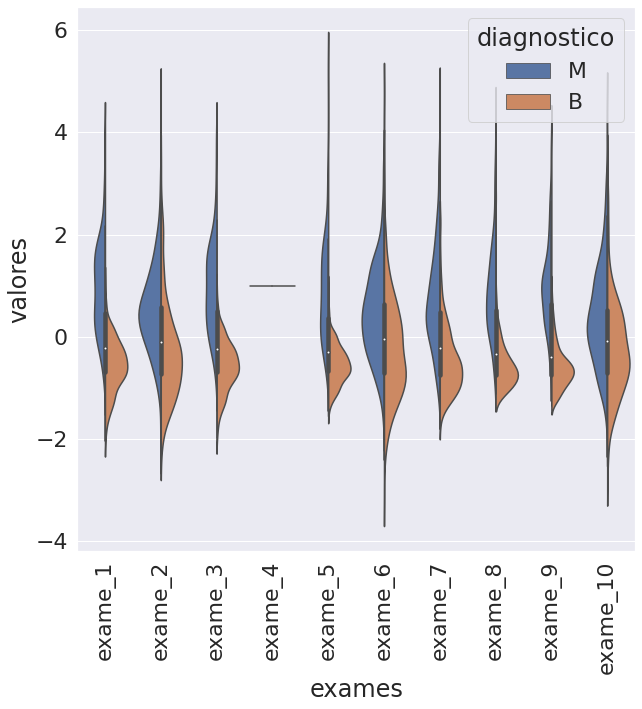

In [58]:
pradonizador = StandardScaler()
pradonizador.fit(valores_exames_v1)
valores_exames_v2 = pradonizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(valores_exames_v2, columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:, 0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y="valores", hue="diagnostico", data=dados_plot, split=True)
plt.xticks(rotation=90)

In [59]:
valores_exames_v2.exame_4

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    1.0
Name: exame_4, Length: 569, dtype: float64

In [60]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico, valores.iloc[:, inicio:fim]], axis=1)
  dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

  plt.figure(figsize=(10,10))
  sns.violinplot(x = "exames", y="valores", hue="diagnostico", data=dados_plot, split=True)
  plt.xticks(rotation=90)

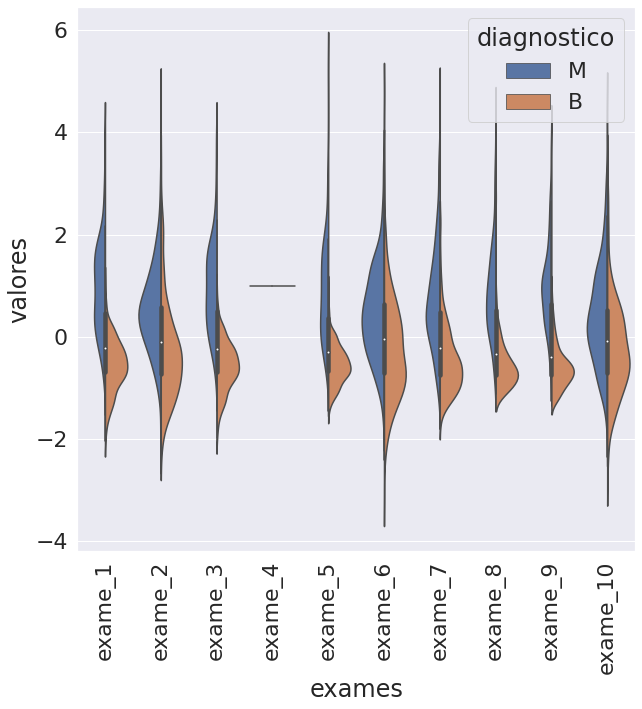

In [61]:
grafico_violino(valores_exames_v2, 0, 10)

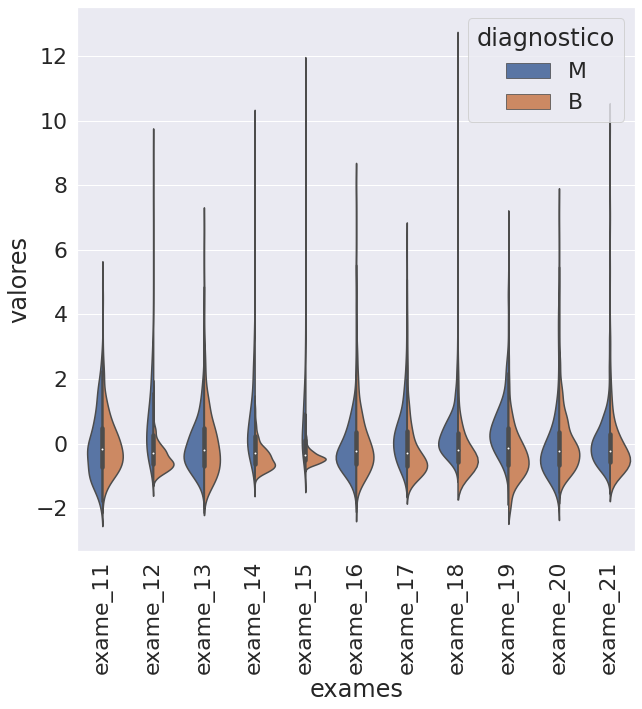

In [62]:
grafico_violino(valores_exames_v2, 10, 21)

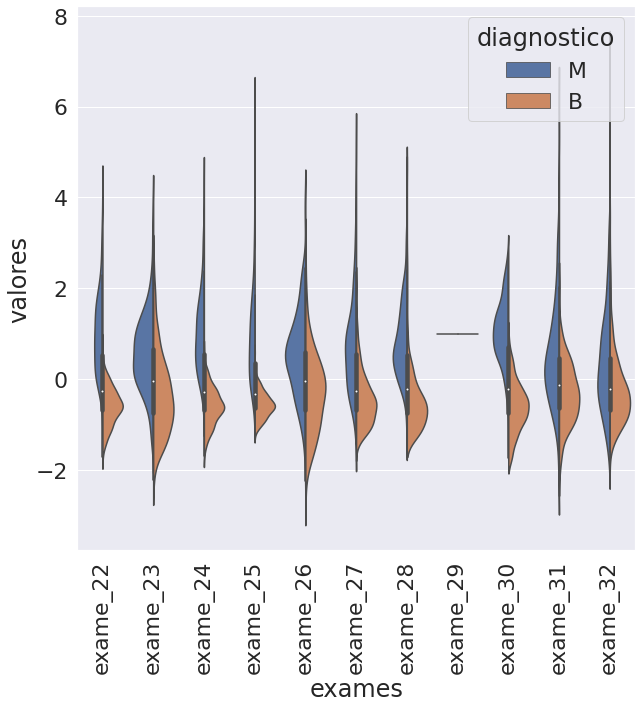

In [63]:
grafico_violino(valores_exames_v2, 21, 32)

In [64]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4', 'exame_29'])

In [65]:
def classificar(valores):
  SEED = 1234
  random.seed(SEED)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3)

  classificador = RandomForestClassifier(n_estimators=100)
  classificador.fit(treino_x, treino_y)

  resultado = classificador.score(teste_x, teste_y)
  print(f"Resultado da classificação {round(resultado*100,2)}%")

In [66]:
classificar(valores_exames_v3)

Resultado da classificação 92.98%


In [67]:
matriz_correlacao = valores_exames_v3.corr()

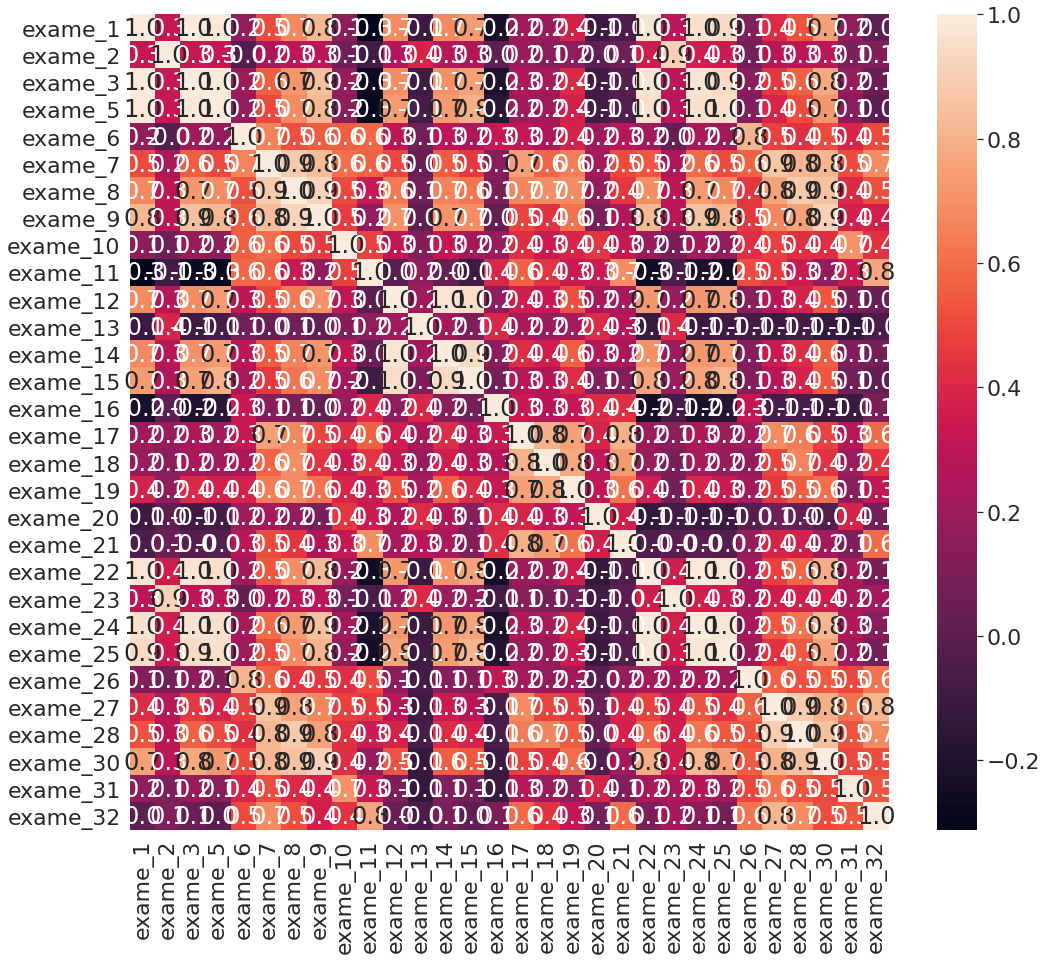

In [68]:
plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot=True, fmt=".1f")

In [69]:
  matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
  matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

In [71]:
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [72]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [73]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [74]:
classificar(valores_exames_v4)

Resultado da classificação 91.81%


In [75]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'])

In [76]:
classificar(valores_exames_v5)

Resultado da classificação 92.98%


In [77]:
selecionar_kmelhores = SelectKBest(chi2, k=5)

In [78]:
valores_exames_v6 = valores_exames_v1.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])

In [79]:
SEED = 1234
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [80]:
treino_kbest.shape

(398, 5)

In [81]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
resultado = classificador.score(teste_kbest, teste_y)
print(f"Resultado da classificação {round(resultado*100,2)}%")

Resultado da classificação 92.4%


In [82]:
predicao = classificador.predict(teste_kbest)
matriz_confusao = confusion_matrix(teste_y, predicao)

In [83]:
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

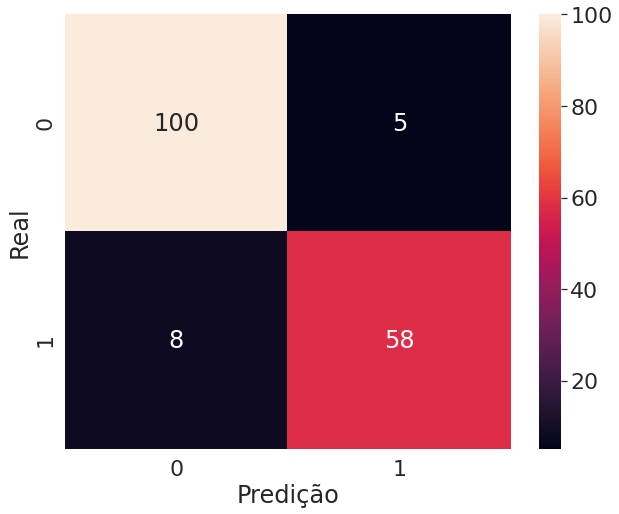

In [84]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

Resultado da classificação 90.06%


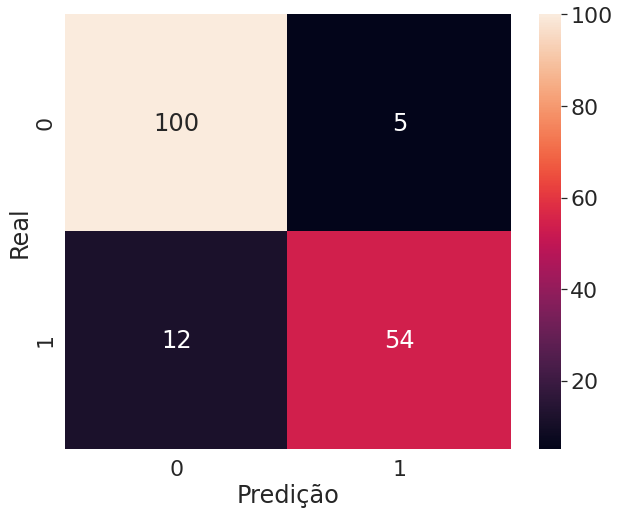

In [85]:
SEED = 1234
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator=classificador, n_features_to_select=5, step=1)
selecionador_rfe.fit(treino_x, treino_y)

treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

predicao = classificador.predict(teste_rfe)
matriz_confusao = confusion_matrix(teste_y, predicao)
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

resultado = classificador.score(teste_rfe, teste_y)
print(f"Resultado da classificação {round(resultado*100,2)}%")

Resultado da classificação 92.98%


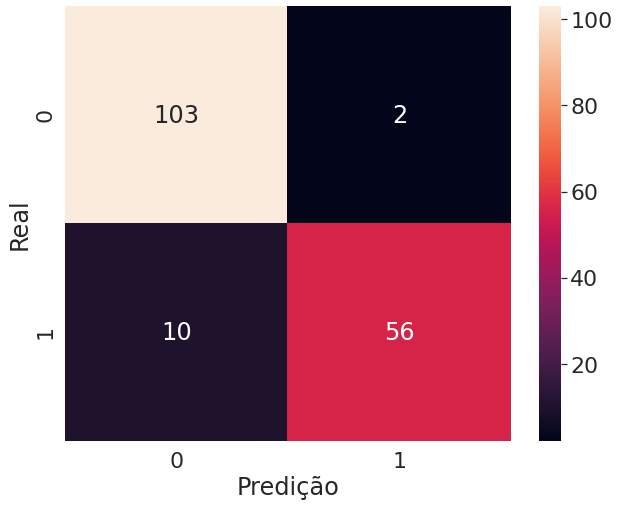

In [86]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))

In [87]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

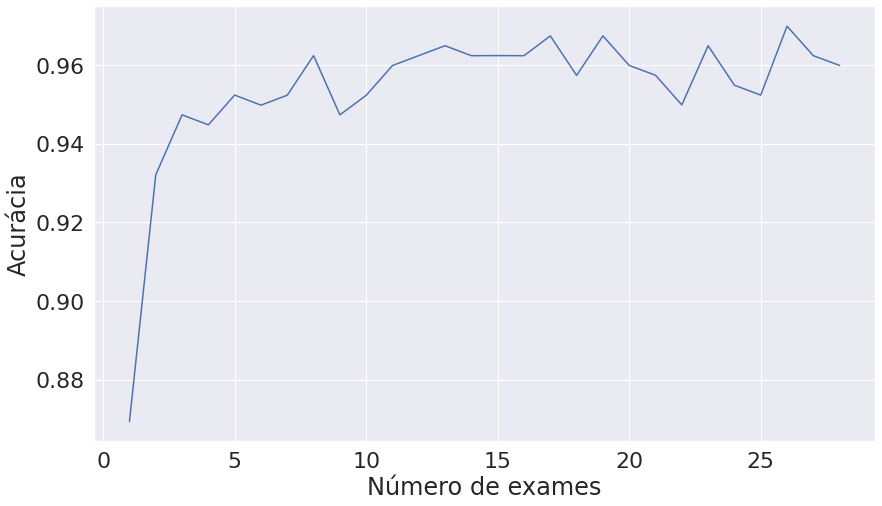

In [90]:
plt.figure(figsize=(14,8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
plt.show()

In [91]:
selecionador_rfe = RFE(estimator=classificador, n_features_to_select=2, step=1)
selecionador_rfe.fit(treino_x, treino_y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=1234,
                                     verbose=0, warm_start=False),
    n_features_to_select=2, step=1, verbose=0)

In [92]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [93]:
valores_exames_v7.shape

(569, 2)

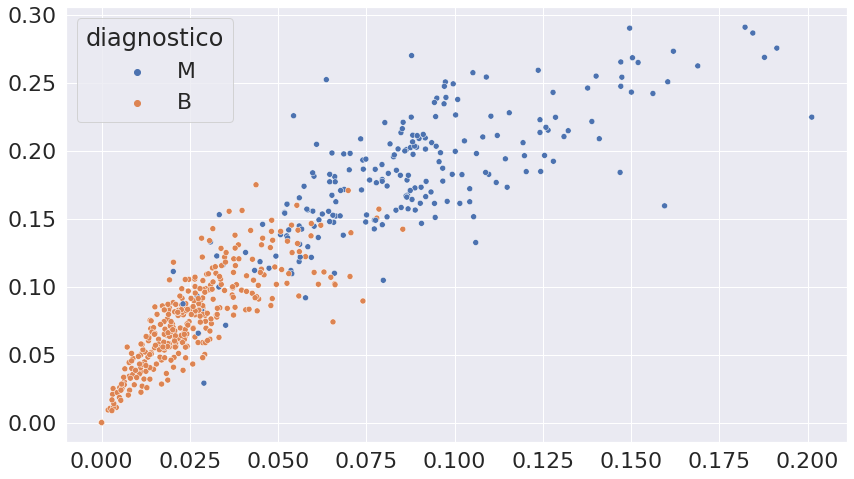

In [95]:
plt.figure(figsize=(14,8))
sns.scatterplot(x= valores_exames_v7[:, 0], y=valores_exames_v7[:, 1], hue=diagnostico)

In [96]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components=2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

In [101]:
valores_exames_v8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

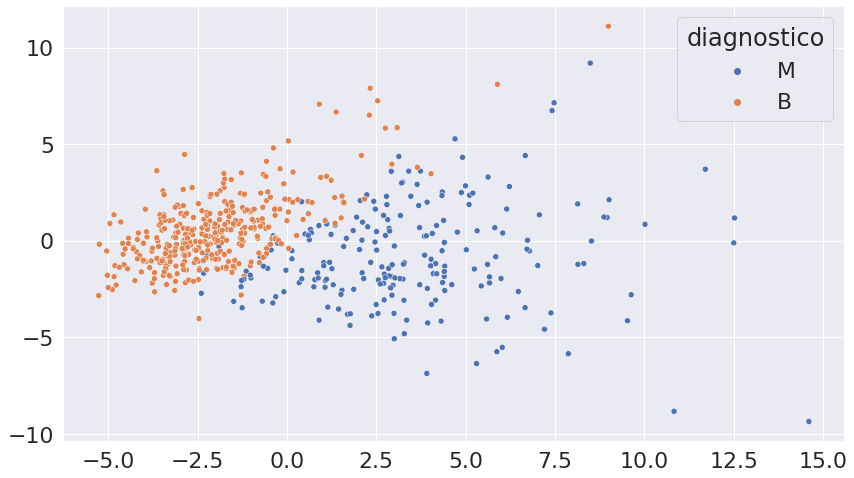

In [102]:
plt.figure(figsize=(14,8))
sns.scatterplot(x= valores_exames_v8[:, 0], y=valores_exames_v8[:, 1], hue=diagnostico)

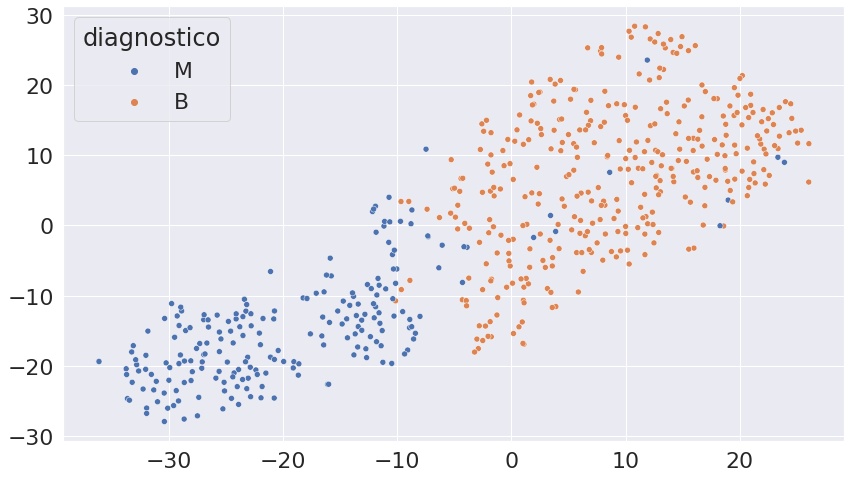

In [104]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x= valores_exames_v9[:, 0], y=valores_exames_v9[:, 1], hue=diagnostico)